###Obrada informacija

#4. Laboratorijska vježba:  Multivarijatni financijski vremenski nizovi

*Prosinac 2023.*

##Upute

U ovoj bilježnici dana je priprema sa svim uputama za 4. laboratorijsku vježbu iz predmeta Obrada informacija - uz bilježnicu su dostupni i podatci u datoteci `prices.csv`.

Vaš zadatak je u bilježnicu na odgovarajuća mjesta dopisati kod Vašeg rješenja,.

**Riješenu bilježnicu potrebno je predati kao izvještaj u .pdf formatu na *Moodle* najkasnije do 14.1.2024. u 23:59h. Datoteka koju predajete se mora zvati *PrezimeImeJMBAG.pdf*.**



## Uvod

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne dnevne cijene 24 ETF-a (eng. *exchange traded fund*) koji prate određene dioničke, obvezničke ili druge indekse.

Oznaka | Naziv | Klasa imovine
--- | --- | ---
SPY | SPDR S&P 500 ETF Trust | Equity: U.S. - Large Cap
IEFA | iShares Core MSCI EAFE ETF | Equity: Developed Markets Ex-U.S. - Total Market
VWO | Vanguard FTSE Emerging Markets ETF | Equity: Emerging Markets - Total Market
EWJ | iShares MSCI Japan ETF | Equity: Japan - Total Market
XLF | Financial Select Sector SPDR Fund | Equity: U.S. Financials
XLK | Technology Select Sector SPDR Fund | Equity: U.S. Technology
XLV | Health Care Select Sector SPDR Fund | Equity: U.S. Health Care
XLY | Consumer Discretionary Select Sector SPDR Fund | Equity: U.S. Consumer Cyclicals
XLP | Consumer Staples Select Sector SPDR Fund | Equity: U.S. Consumer Non-cyclicals
XLU | Utilities Select Sector SPDR Fund | Equity: U.S. Utilities
XLI | Industrial Select Sector SPDR Fund | Equity: U.S. Industrials
XLE | Energy Select Sector SPDR Fund | Equity: U.S. Energy
XLC | Communication Services Select Sector SPDR Fund | Equity: U.S. Telecommunications
XLRE | Real Estate Select Sector SPDR Fund | Equity: U.S. Real Estate
XLB | Materials Select Sector SPDR Fund | Equity: U.S. Basic Materials
BND | Vanguard Total Bond Market ETF | Fixed Income: U.S. - Broad Market |  Broad-based Investment Grade
LQD | iShares iBoxx USD Investment Grade Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based Investment Grade
BNDX | Vanguard Total International Bond ETF | Fixed Income: Global Ex-U.S. - Broad Market |  Broad-based Investment Grade
SHV | iShares Short Treasury Bond ETF | Fixed Income: U.S. - Government |  Treasury Investment Grade Ultra-Short Term
HYG | iShares iBoxx USD High Yield Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based High Yield
GLD | SPDR Gold Trust | Commodities: Precious Metals Gold
SLV | iShares Silver Trust | Commodities: Precious Metals Silver
PDBC | Invesco Optimum Yield Diversified Commodity Strategy No K-1 ETF | Commodities: Broad Market
USO | United States Oil Fund LP | Commodities: Energy Crude Oil

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, koristit ćemo aritmetičke povrate:

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$

gdje je $S(t)$ cijena vrijednosnice u danu $t$. U sklopu ove laboratorijske vježbe cilj je analizirati kretanje danih ETF-ova i izračunati glavne komponente (PCA) koje utječu na njihovu dinamiku. Laboratorijsku vježbu je potrebno riješiti unutar ove bilježnice i predati riješenu bilježnicu kao izvještaj.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prices = pd.read_csv("prices.csv")
prices.set_index("Time", inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()

,SPY,IEFA,VWO,EWJ,XLF,XLK,XLV,XLY,XLP,XLU,...,XLB,BND,LQD,BNDX,SHV,HYG,GLD,SLV,PDBC,USO
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-02,231.492233,48.000053,33.417080,47.497765,21.776472,59.029892,78.483353,95.259102,44.591763,44.784126,...,46.068901,69.980576,97.039024,48.517841,101.234894,63.253788,121.330002,14.56,8.545244,78.800003
2019-01-03,225.968170,47.684727,32.893154,47.227894,21.286907,56.050797,76.889748,93.196533,44.335598,44.775520,...,44.762505,70.253906,97.081886,48.517841,101.271584,63.285011,122.430000,14.75,8.607411,79.599998
2019-01-04,233.537125,49.129986,33.932262,48.828522,21.994057,58.534962,79.183434,96.280815,45.280781,45.438545,...,46.522518,70.042305,97.021873,48.473194,101.299133,64.347198,121.440002,14.73,8.731748,81.440002
2019-01-07,235.378525,49.366474,34.002121,48.949490,22.021255,59.058445,79.487411,98.457954,45.218948,45.128563,...,46.685822,69.936508,97.030441,48.357071,101.299133,64.971985,121.860001,14.67,8.799566,82.320000
2019-01-08,237.589920,49.716839,34.194221,49.182148,22.039383,59.553371,80.104607,99.546509,45.634129,45.688255,...,47.175724,69.848312,97.244827,48.321350,101.289948,65.393723,121.529999,14.69,8.873038,84.000000


# Zadatak 1 - Računanje korelacijske matrice i matrice kovarijance povrata

1.1. U prvom zadatku ove laboratorijske vježbe potrebno je prvo iz danih cijena (gore učitanih u Pandas DataFrame) izračunati dnevne povrate za sve pojedine vrijednosnice (prateći formulu danu u uvodu).

Izračunajte srednje povrate i volatilnost (standardnu devijaciju povrata) za svaku pojedinu vrijednosnicu. Pri analizi srednjih povrata i volatilnosti, te se brojke često *anualiziraju* - to znači da se srednji povrati pomnože s $252$ (cca. broj trgovinskih dana u godini), a volatilnost s $\sqrt{252}$.

**Izračunajte anualizirane srednje povrate i volatilnosti. Sve ETF-ove prikažite u dijagramu raspršenja s volatilnošću na x-osi i srednjim povratom na y-osi.**

Razmislite - koji se ETF-ovi ističu po odnosu povrata i rizika (posebno dobri ili posebno loši kao investicije)?


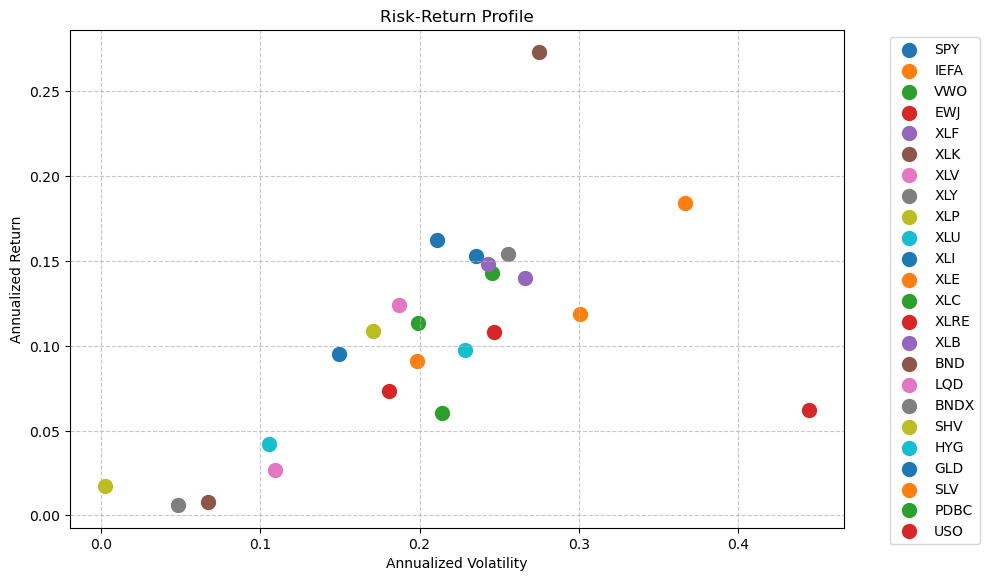

In [9]:
change = prices.pct_change()
tickers = list(change.columns)

mean_return_annualized = change.mean() * 252
mean_volatility_annualized = change.std() * np.sqrt(252)
plt.figure(figsize=(10, 6))

for i, ticker in enumerate(tickers):
    plt.scatter(
        mean_volatility_annualized[ticker],
        mean_return_annualized[ticker],
        s=100,
        label=ticker,
    )

plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Risk-Return Profile")

plt.grid(True, linestyle="--", alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

plt.show()

1.2. Kovarijancu i korelaciju moguće je iz podataka izračunati koristeći Pandas, ali i NumPy ili neke druge biblioteke.

**Koristeći dnevne povrate, izračunajte matricu kovarijance $\Sigma$ i matricu korelacije $C$ povrata svih ETF-ova.
Matrice ispišite u konzolu ili vizualizirajte.**

Proučite strukturu matrice i razmislite o tome koje zajedničke komponente u podatcima možete očekivati.

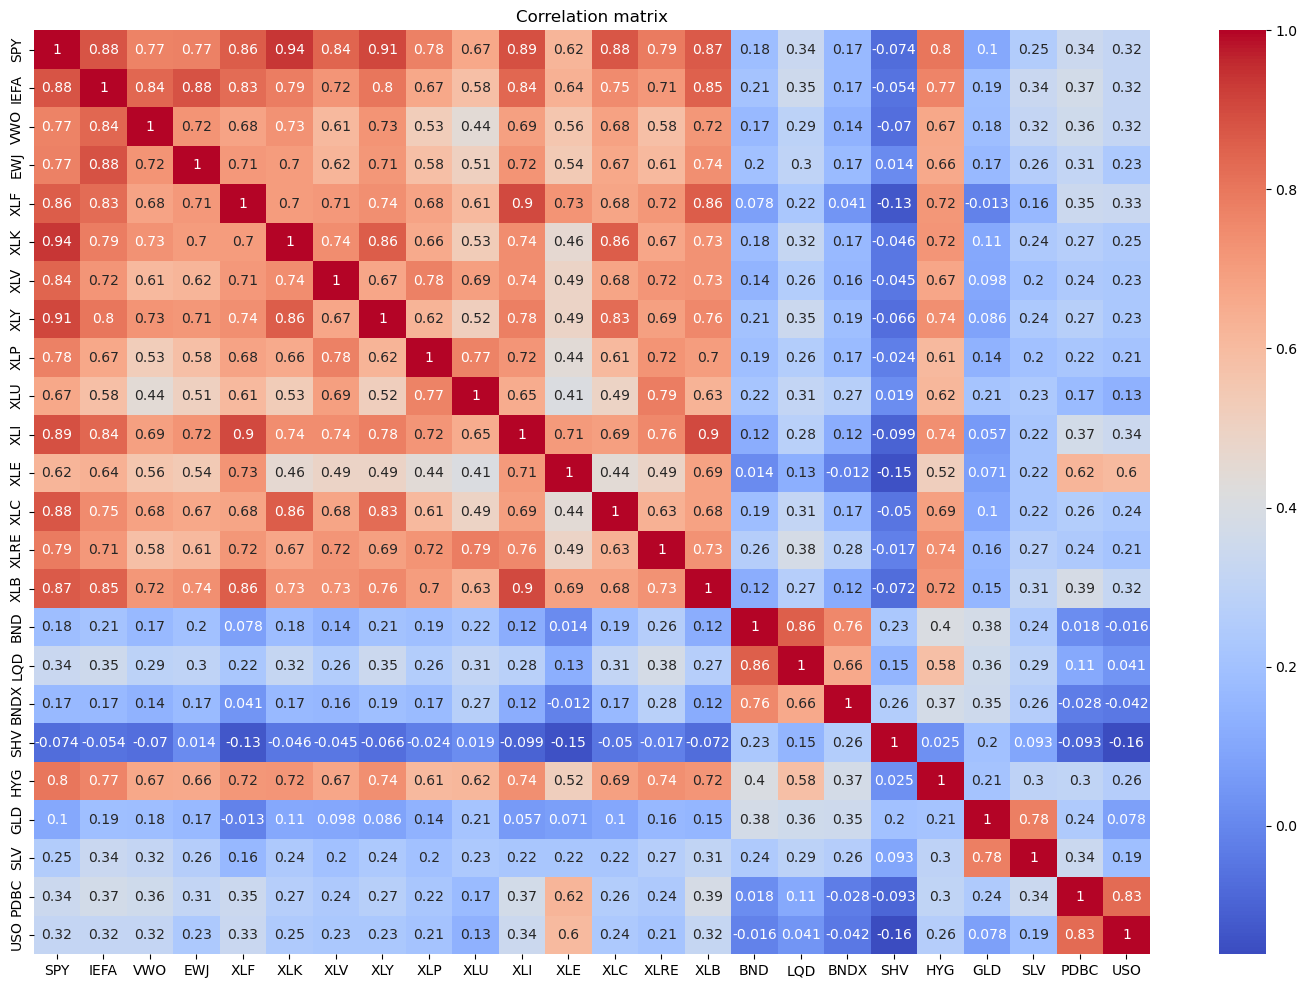

In [10]:
corr_matrix = change.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [11]:
cov_matrix = change.cov()

cov_matrix

,SPY,IEFA,VWO,EWJ,XLF,XLK,XLV,XLY,XLP,XLU,...,XLB,BND,LQD,BNDX,SHV,HYG,GLD,SLV,PDBC,USO
SPY,1.761574e-04,1.457528e-04,1.376812e-04,1.170823e-04,1.918401e-04,2.158161e-04,1.318726e-04,1.934884e-04,1.107683e-04,1.274866e-04,...,1.757895e-04,1.032848e-05,3.073254e-05,6.836683e-06,-1.782225e-07,7.076129e-05,1.307499e-05,6.410859e-05,5.730408e-05,1.171177e-04
IEFA,1.457528e-04,1.563030e-04,1.409613e-04,1.259424e-04,1.728926e-04,1.701803e-04,1.061152e-04,1.614538e-04,8.944329e-05,1.049761e-04,...,1.626840e-04,1.106674e-05,3.035281e-05,6.458734e-06,-1.215006e-07,6.390899e-05,2.218935e-05,7.962121e-05,5.856160e-05,1.116622e-04
VWO,1.376812e-04,1.409613e-04,1.815550e-04,1.112717e-04,1.534720e-04,1.706754e-04,9.604616e-05,1.574461e-04,7.605146e-05,8.575088e-05,...,1.479333e-04,9.632471e-06,2.706990e-05,5.747600e-06,-1.699283e-07,5.976081e-05,2.325321e-05,8.086376e-05,6.037230e-05,1.196180e-04
EWJ,1.170823e-04,1.259424e-04,1.112717e-04,1.299253e-04,1.357587e-04,1.387625e-04,8.357183e-05,1.310982e-04,7.151245e-05,8.290778e-05,...,1.284975e-04,9.707243e-06,2.332045e-05,5.987623e-06,2.821937e-08,5.006845e-05,1.778782e-05,5.718553e-05,4.461771e-05,7.435808e-05
XLF,1.918401e-04,1.728926e-04,1.534720e-04,1.357587e-04,2.808551e-04,2.036297e-04,1.406268e-04,1.994529e-04,1.225315e-04,1.461856e-04,...,2.209945e-04,5.550302e-06,2.590348e-05,2.102074e-06,-4.059010e-07,8.011112e-05,-1.998805e-06,5.123144e-05,7.280871e-05,1.564442e-04
XLK,2.158161e-04,1.701803e-04,1.706754e-04,1.387625e-04,2.036297e-04,2.996448e-04,1.510928e-04,2.403027e-04,1.222616e-04,1.316509e-04,...,1.937529e-04,1.330583e-05,3.825942e-05,8.851570e-06,-1.452970e-07,8.294049e-05,1.719533e-05,7.808044e-05,5.823096e-05,1.189163e-04
XLV,1.318726e-04,1.061152e-04,9.604616e-05,8.357183e-05,1.406268e-04,1.510928e-04,1.385254e-04,1.271010e-04,9.811664e-05,1.172870e-04,...,1.310538e-04,7.160052e-06,2.096342e-05,5.695455e-06,-9.666214e-08,5.245450e-05,1.085658e-05,4.390190e-05,3.552949e-05,7.579423e-05
XLY,1.934884e-04,1.614538e-04,1.574461e-04,1.310982e-04,1.994529e-04,2.403027e-04,1.271010e-04,2.591421e-04,1.078307e-04,1.199366e-04,...,1.861967e-04,1.404303e-05,3.828408e-05,9.282111e-06,-1.939843e-07,7.940941e-05,1.310897e-05,7.235107e-05,5.444496e-05,1.034852e-04
XLP,1.107683e-04,8.944329e-05,7.605146e-05,7.151245e-05,1.225315e-04,1.222616e-04,9.811664e-05,1.078307e-04,1.154083e-04,1.193987e-04,...,1.143999e-04,8.633379e-06,1.900692e-05,5.575668e-06,-4.617104e-08,4.330333e-05,1.405772e-05,4.033467e-05,2.980149e-05,6.289437e-05
XLU,1.274866e-04,1.049761e-04,8.575088e-05,8.290778e-05,1.461856e-04,1.316509e-04,1.172870e-04,1.199366e-04,1.193987e-04,2.069732e-04,...,1.386152e-04,1.322661e-05,3.080993e-05,1.193018e-05,4.848319e-08,5.912695e-05,2.878039e-05,6.391738e-05,3.136934e-05,5.387372e-05


# Zadatak 2 - Analiza glavnih komponenti

2.1. Za analizu glavnih komponenti potrebno je izračunati svojstvenu dekompoziciju, koju možete pronaći u sklopu biblioteke NumPy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html.

**Izračunajte svojstvene vektore i pripadajuće svojstvene vrijednosti matrice kovarijance povrata $\Sigma$. Poredajte komponente padajući po svojstvenim vrijednostima i prikažite svojstvene vrijednosti grafički.**



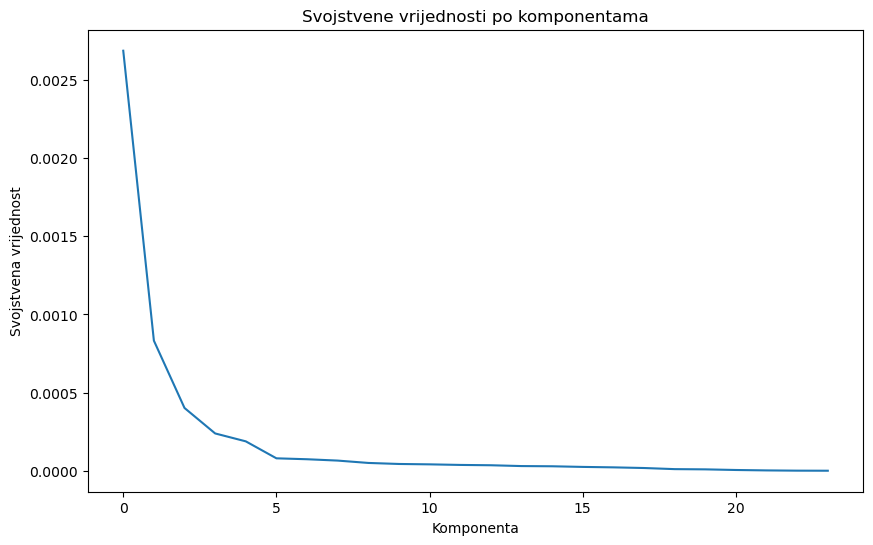

Svojstveni vektori:
 [[ 2.42717418e-01  1.17287156e-01 -3.91987690e-02  1.15221778e-01
  -1.92222364e-03  1.26123364e-01  6.56156151e-02  2.98920495e-02
  -4.57596024e-02  5.64810725e-02  6.10510555e-02  4.80980662e-02
   1.70823040e-02 -1.31702095e-02  6.36173326e-02  3.34027426e-03
   1.93214451e-02  4.06824693e-03 -1.48280343e-02 -7.75647300e-03
  -2.05670138e-02  1.40917665e-02  9.35022568e-01 -1.63105228e-03]
 [ 2.17902110e-01  7.89183996e-02  2.66392647e-02  9.50598589e-03
  -1.27001615e-01 -3.52056705e-01 -7.07098407e-02  1.00090516e-01
  -5.72674540e-02 -8.98548923e-02 -1.15557474e-01  1.24886338e-01
   1.06887060e-01  7.19005285e-03 -2.29586622e-02 -4.64812467e-02
  -3.86033517e-02 -3.92640826e-02  7.59134615e-01 -3.76676849e-01
   1.21310322e-01  2.83861603e-03 -1.40051311e-03 -1.60180345e-03]
 [ 2.07675340e-01  5.69928003e-02  4.71615660e-02  1.14167334e-01
  -2.42326645e-01 -4.41767435e-01 -2.51726699e-01  3.39730876e-01
   4.42252088e-01  2.79382703e-01  7.37096459e-02 -3.

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


plt.figure(figsize=(10, 6))
plt.plot(range(len(eigenvalues)), eigenvalues)
plt.xlabel("Komponenta")
plt.ylabel("Svojstvena vrijednost")
plt.title("Svojstvene vrijednosti po komponentama")
plt.show()

print("Svojstveni vektori:\n", eigenvectors[:3])

2.2. **Izračunajte koliki udio varijance objašnjavaju prve tri komponente?**

In [13]:
explained_by_var = eigenvalues / np.sum(eigenvalues)

print(
    f"Varijanca objašnjena prvim trima komponentama: {explained_by_var[:3].sum()*100:.2f}%"
)

Varijanca objašnjena prvim trima komponentama: 79.71%


2.3. Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti.  

**Prikažite grafički (npr. stupčastim dijagramom za svaku komponentu posebno) koeficijente prve 3 glavne komponente (elemente prva tri svojstvena vektora).**

S obzirom na to koje vrijednosnice opisuju prve tri komponente, razmislite možete li zaključiti kakve zajedničke faktore u tržištu opisuju razmatrane komponente?

NAPOMENA: pripazite na to što vraća funkcija koju koristite i u kojoj se dimenziji (stupac ili red) nalaze svojstveni vektori.

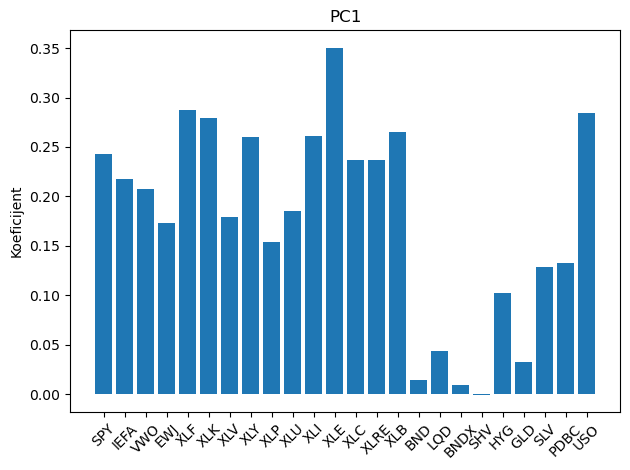

In [14]:
first_three = eigenvectors[:, :3]

plt.bar(tickers, first_three[:, 0])
plt.title(f"PC{1}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

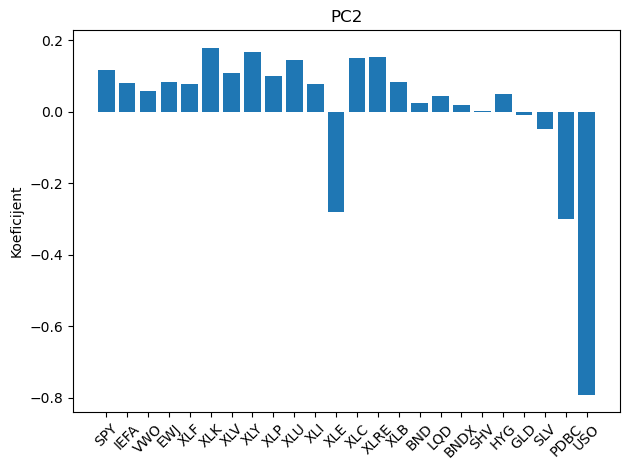

In [15]:
plt.bar(tickers, first_three[:, 1])
plt.title(f"PC{2}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

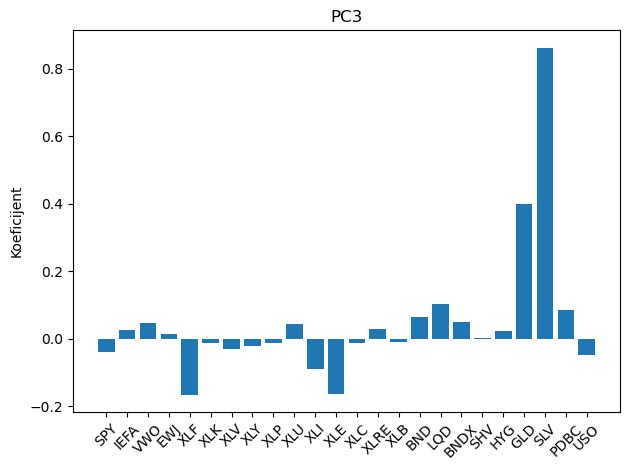

In [16]:
plt.bar(tickers, first_three[:, 2])
plt.title(f"PC{3}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

2.4. **Ponovite prethodnu analizu za matricu korelacije povrata $C$ (prikažite svojstvene vrijednosti, udio varijance i koeficijente pojedinih komponenti za prve tri komponente).**

Usporedite rezultate - mijenjaju li se interpretacije komponenti?

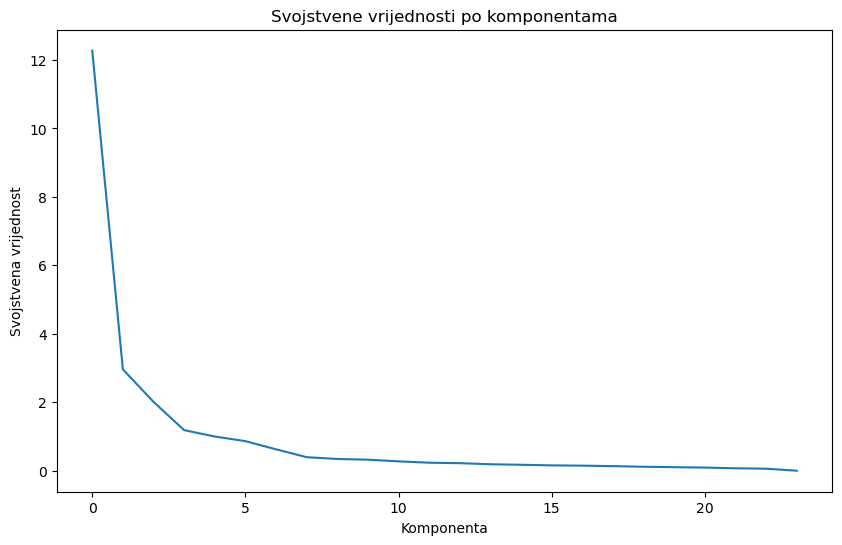

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

plt.figure(figsize=(10, 6))
plt.plot(range(len(eigenvalues)), eigenvalues)
plt.xlabel("Komponenta")
plt.ylabel("Svojstvena vrijednost")
plt.title("Svojstvene vrijednosti po komponentama")
plt.show()

In [18]:
explained_by_var = eigenvalues / np.sum(eigenvalues)

print(
    f"Variance explained by first three components: {explained_by_var[:3].sum()*100:.2f}%"
)

Variance explained by first three components: 71.86%


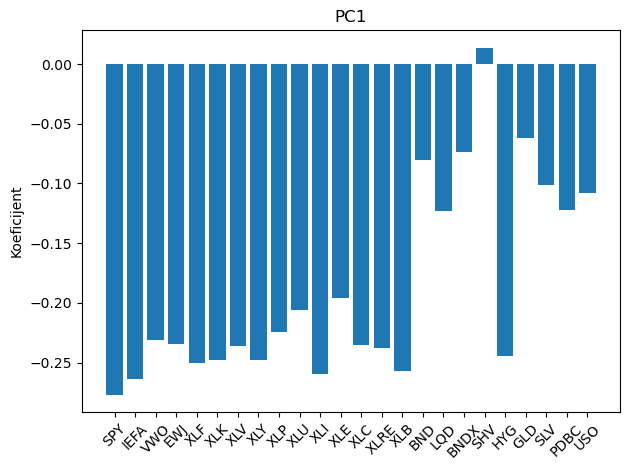

In [19]:
plt.bar(tickers, eigenvectors[:, 0])
plt.title(f"PC{1}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

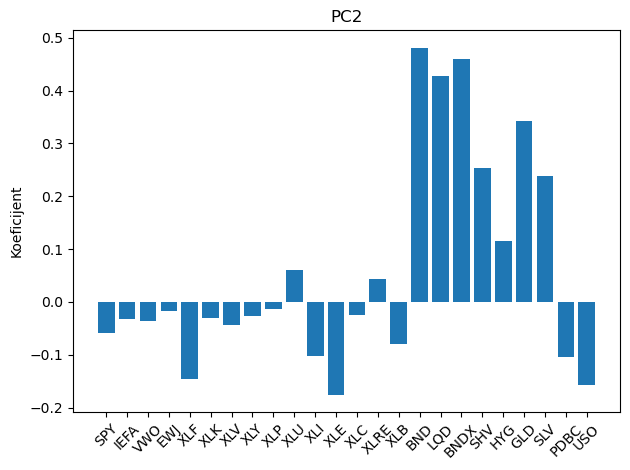

In [20]:
plt.bar(tickers, eigenvectors[:, 1])
plt.title(f"PC{2}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

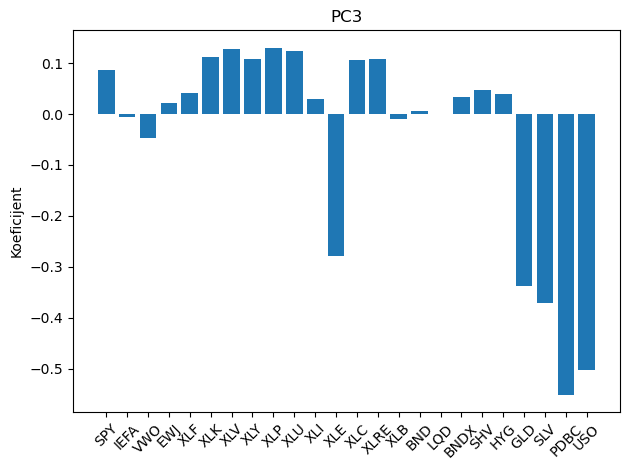

In [21]:
plt.bar(tickers, eigenvectors[:, 2])
plt.title(f"PC{3}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

Postoje razlike u interpretaciji komponenti između korelacijske i kovarijantne matrice. Korelacijska matrica se standardizira na range [-1,1], što eliminira utjecaj volatilnosti na matricu. Korelacijska matrica gleda samo međuovisnost u kretanjima cijena među parovima vrijednosnica, kod kovarijance volatilnost utječe na glavne komponente i daje im veću težinu.

# Zadatak 3 - Svojstveni portfelji

U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji.

Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Same težine svojstvenih portfelja mogu biti rotirane i skalirane u odnosu na elemente svojstvenih vektora.

U ovoj analizi ćemo pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:

$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.

Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:

$R_p = \sum{R_i w_i} = R\cdot w$.


**Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve tri glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta tri svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100).**



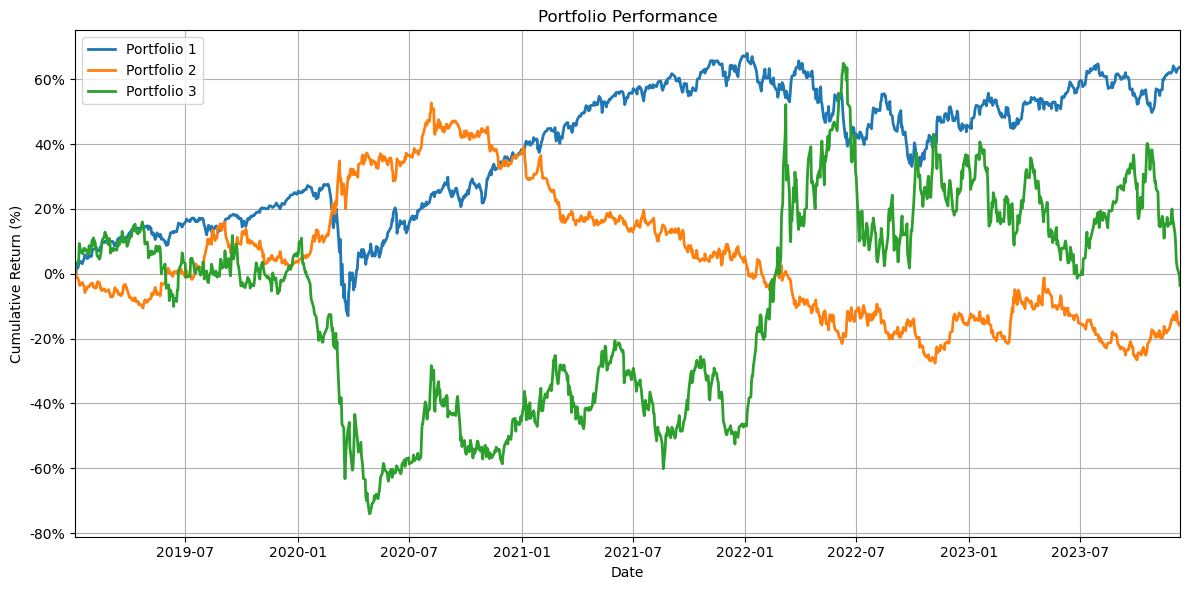

In [22]:
plt.figure(figsize=(12, 6))

all_portfolio_changes = {}

for k in range(3):
    weights = eigenvectors[:, k]
    if sum(weights) < 0:
        weights = -weights

    weights = weights / abs(weights.sum())

    port = pd.DataFrame(weights, index=tickers, columns=["Weights"]).T

    value = 100000

    # NE rebalansiramo dnevno, pretpostavljam pasivno investiranje
    # kupimo u početnom trenutku dionice i ne diramo ih, da rebalansiramo dnevno bi skalirali cijeli vektor povrata s weightovima
    start_prices = prices.iloc[0]
    shares = (port.iloc[0] * value) / start_prices

    port_prices = (prices * shares).sum(axis=1)

    port_change = port_prices.pct_change().fillna(0)
    all_portfolio_changes[k] = port_change
    cum = (1 + port_change).cumprod() - 1

    plt.plot(cum.index, cum * 100, label=f"Portfolio {k+1}", linewidth=2)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: "{:.0f}%".format(y)))
plt.xlim(cum.index.min(), cum.index.max())
plt.title("Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ako usporedite dobivene rezultate s kretanjem cijena originalnih vrijednosnica, vidjet ćete sličnosti između vrijednosnica koje pripadaju određenim klasama imovina i pojedinih svojstvenih portfelja. Svojstveni portfelji dakle predstavljaju niže-dimenzionalan prostor tzv. sintetičkih vrijednosnica (u našem slučaju 3 umjesto originalnih 24) koje najbolje opisuju cijeli razmatrani skup podataka. Dobra procjena tih komponenti je ključna u razumijevanju zajedničkog kretanja većih skupova dionica i upravljanju financijskim rizikom.

Razmislite što to znači za tržište koje smo analizirali - koji su glavni izvori rizika prevladavali u razmatranom periodu?

**Izračunajte korelacijske koeficijente između povrata tri razmatrana svojstvena portfelja (realizacije prve tri glavne komponente) i svih pojedinih ETF-ova - za svaki od tri svojstvena portfelja pronađite ETF koji mu je najsličniji (najviši iznos korelacije povrata).**

In [23]:
for k in range(3):
    coeff = {}
    port_k = all_portfolio_changes[k]
    for tick in tickers:
        coeff[tick] = port_k.corr(change[tick])
    max_corr, ticker = max(coeff.values()), max(coeff, key=coeff.get)
    print(
        f"Portfelj {k+1} je najviše koreliran s ETF-om {ticker}, corr = {max_corr*100:.2f}%"
    )

# ovo ima smisla, ako gledamo glavne komponente pc1,pc2 i pc3, upravo etfovi najviše pridonose komponenti
# također i najbolje opisuju asset klase koje predstavljaju

Portfelj 1 je najviše koreliran s ETF-om SPY, corr = 97.98%
Portfelj 2 je najviše koreliran s ETF-om GLD, corr = 52.05%
Portfelj 3 je najviše koreliran s ETF-om PDBC, corr = 70.53%
